In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


619

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | aksarka
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | nantucket
Processing Record 6 of Set 1 | constitucion
Processing Record 7 of Set 1 | shache
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | zhanatas
City not found. Skipping...
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | tavricheskoye
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | chapais
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | bengkulu
Processing Record 23 

Processing Record 37 of Set 4 | grindavik
Processing Record 38 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | college
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | buala
Processing Record 43 of Set 4 | meyungs
City not found. Skipping...
Processing Record 44 of Set 4 | bahia blanca
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | tyukhtet
Processing Record 48 of Set 4 | uwayl
City not found. Skipping...
Processing Record 49 of Set 4 | gravdal
Processing Record 50 of Set 4 | saint-louis
Processing Record 1 of Set 5 | tasiilaq
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 5 | araouane
Processing Record 5 of Set 5 | souillac
Processing Record 6 of Set 5 | portsmouth
Processing Record 7 of Se

Processing Record 25 of Set 8 | basco
Processing Record 26 of Set 8 | simpang
Processing Record 27 of Set 8 | pizarro
Processing Record 28 of Set 8 | nouadhibou
Processing Record 29 of Set 8 | sur
Processing Record 30 of Set 8 | kuryk
Processing Record 31 of Set 8 | tahta
Processing Record 32 of Set 8 | tupiza
Processing Record 33 of Set 8 | gelemso
Processing Record 34 of Set 8 | sorland
Processing Record 35 of Set 8 | georgetown
Processing Record 36 of Set 8 | yamada
Processing Record 37 of Set 8 | beringovskiy
Processing Record 38 of Set 8 | sestri levante
Processing Record 39 of Set 8 | ulaangom
Processing Record 40 of Set 8 | cabedelo
Processing Record 41 of Set 8 | port moresby
Processing Record 42 of Set 8 | tuxpan
Processing Record 43 of Set 8 | kieta
Processing Record 44 of Set 8 | inza
Processing Record 45 of Set 8 | the valley
Processing Record 46 of Set 8 | serta
Processing Record 47 of Set 8 | tidore
City not found. Skipping...
Processing Record 48 of Set 8 | codrington
Pr

Processing Record 13 of Set 12 | castenaso
Processing Record 14 of Set 12 | weligama
Processing Record 15 of Set 12 | viedma
Processing Record 16 of Set 12 | miraflores
Processing Record 17 of Set 12 | ravar
Processing Record 18 of Set 12 | champerico
Processing Record 19 of Set 12 | port shepstone
Processing Record 20 of Set 12 | kawambwa
Processing Record 21 of Set 12 | lalmanir hat
City not found. Skipping...
Processing Record 22 of Set 12 | santo antonio do ica
Processing Record 23 of Set 12 | leo
Processing Record 24 of Set 12 | serenje
Processing Record 25 of Set 12 | fianga
City not found. Skipping...
Processing Record 26 of Set 12 | luganville
Processing Record 27 of Set 12 | yenagoa
Processing Record 28 of Set 12 | stromness
Processing Record 29 of Set 12 | jumla
Processing Record 30 of Set 12 | rusape
Processing Record 31 of Set 12 | naze
Processing Record 32 of Set 12 | tamasi
Processing Record 33 of Set 12 | saint-pierre
Processing Record 34 of Set 12 | labutta
City not fou

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,68.81,84,99,15.37,ZA,2021-12-20 20:31:51
1,Aksarka,66.5606,67.7975,-20.58,90,100,10.98,RU,2021-12-20 20:31:51
2,Cape Town,-33.9258,18.4232,77.41,64,0,5.01,ZA,2021-12-20 20:30:22
3,Castro,-24.7911,-50.0119,76.19,49,2,2.62,BR,2021-12-20 20:31:52
4,Nantucket,41.2835,-70.0995,37.09,70,43,6.24,US,2021-12-20 20:31:52
5,Constitucion,-35.3333,-72.4167,69.44,60,18,18.50,CL,2021-12-20 20:31:52
6,Shache,38.4167,77.2406,30.27,44,100,1.86,CN,2021-12-20 20:31:53
7,Ushuaia,-54.8000,-68.3000,51.42,62,75,39.12,AR,2021-12-20 20:31:53
8,Ribeira Grande,38.5167,-28.7000,61.20,77,75,23.02,PT,2021-12-20 20:31:53
9,Hasaki,35.7333,140.8333,36.00,61,10,10.00,JP,2021-12-20 20:31:54


In [13]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
reordered_city_data_df = city_data_df[new_column_order]
reordered_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-12-20 20:31:51,-34.4187,19.2345,68.81,84,99,15.37
1,Aksarka,RU,2021-12-20 20:31:51,66.5606,67.7975,-20.58,90,100,10.98
2,Cape Town,ZA,2021-12-20 20:30:22,-33.9258,18.4232,77.41,64,0,5.01
3,Castro,BR,2021-12-20 20:31:52,-24.7911,-50.0119,76.19,49,2,2.62
4,Nantucket,US,2021-12-20 20:31:52,41.2835,-70.0995,37.09,70,43,6.24


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
reordered_city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = reordered_city_data_df["Lat"]
max_temps = reordered_city_data_df["Max Temp"]
humidity = reordered_city_data_df["Humidity"]
cloudiness = reordered_city_data_df["Cloudiness"]
wind_speed = reordered_city_data_df["Wind Speed"]

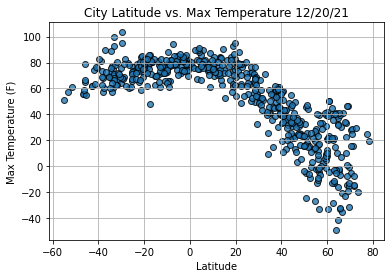

In [16]:
# Import time module
import time

import numpy as np
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

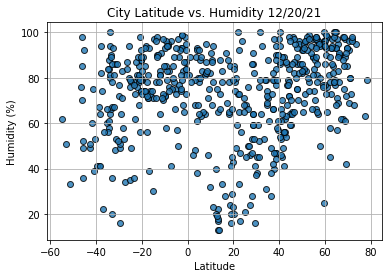

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

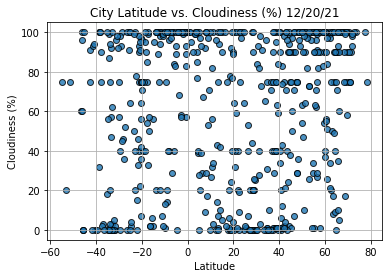

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

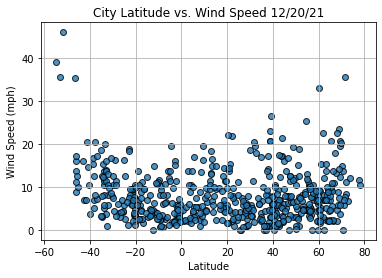

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()